<h1><center>Date Analyse & Cleaning</center></h1>
<h2><center>Juliane Köhler<br>578106</center></h2>

## Import & Data Description

### Import

Inporting the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import csv

Importing the original data:

In [2]:
df = pd.read_csv('F:/Masterarbeit/Scraping/DataSet_7_Original_MA.csv', delimiter=';', header=0)
df = df.rename(columns={'JITA': 'e-LiS', 'springer': 'Springer'})
df

F:\Programme\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

### Data Description

The original dataframe consists of 175,508 entries and 33 colums. The columns are:
- id _[a unique id that is a hash value based on the title of a document]_
- e-LiS _[contains the link to the document in e-LiS if it exists in that database]_
- Springer _[contains the link to the document in Springer Link if it exists in that database]_
- o-bib_[contains the link to the document in o-bib if it exists in that database]_
- DABI _[contains the link to the document in DABI if it exists in that database]_
- language _[the language of the document]_
- title _[the title of the document]_
- abstract _[the abstract of the document]_
- class_1 _[contains the 1st BHR class the document should be allocated to; should not be NaN]_
- class_2 _[contains the 2nd BHR class the document should be allocated to; can be NaN]_
- class_3 _[contains the 3rd BHR class the document should be allocated to; can be NaN]
- class_4 _[contains the 4th BHR class the document should be allocated to; can be NaN]
- class_5 _[contains the 5th BHR class the document should be allocated to; can be NaN]
- class_6 _[contains the 6th BHR class the document should be allocated to; can be NaN]
- class_7 _[contains the 7th BHR class the document should be allocated to; can be NaN]
- class_8 _[contains the 8th BHR class the document should be allocated to; can be NaN]
- class_9 _[contains the 9th BHR class the document should be allocated to; can be NaN]
- class_10 _[contains the 10th BHR class the document should be allocated to; can be NaN]
- class_11 _[contains the 11th BHR class the document should be allocated to; can be NaN]
- class_12 _[contains the 12th BHR class the document should be allocated to; can be NaN]
- class_13 _[contains the 13th BHR class the document should be allocated to; can be NaN]
- class_14 _[contains the 14th BHR class the document should be allocated to; can be NaN]
- class_15 _[contains the 15th BHR class the document should be allocated to; can be NaN]
- class_16 _[contains the 16th BHR class the document should be allocated to; can be NaN]
- class_17 _[contains the 17th BHR class the document should be allocated to; can be NaN]
- class_18 _[contains the 18th BHR class the document should be allocated to; can be NaN]
- class_19 _[contains the 19th BHR class the document should be allocated to; can be NaN]
- class_20 _[contains the 20th BHR class the document should be allocated to; can be NaN]
- class_21 _[contains the 21st BHR class the document should be allocated to; can be NaN]
- class_22 _[contains the 22nd BHR class the document should be allocated to; can be NaN]
- class_23 _[contains the 23rd BHR class the document should be allocated to; can be NaN]
- class_24 _[contains the 24th BHR class the document should be allocated to; can be NaN]
- class_25 _[contains the 25th BHR class the document should be allocated to; can be NaN]

In [3]:
df_db = pd.DataFrame({'e-LiS': [len(df[(df['e-LiS'] != '-')])],
                      'Springer': [len(df[(df['Springer'] != '-')])],
                      'o-bib':[len(df[(df['o-bib'] != '-')])],
                      'DABI':[len(df[(df['DABI'] != '-')])],
                      'e-LiS_Springer': [len(df[(df['e-LiS'] != '-') & (df['Springer'] != '-')])],
                      'e-LiS_o-bib': [len(df[(df['e-LiS'] != '-') & (df['o-bib'] != '-')])],
                      'e-LiS_DABI':[len(df[(df['e-LiS'] != '-') & (df['DABI'] != '-')])],
                      'Springer_o-bib':[len(df[(df['o-bib'] != '-') & (df['Springer'] != '-')])],
                      'Springer_DABI':[len(df[(df['DABI'] != '-') & (df['Springer'] != '-')])],
                      'o-bib_DABI':[len(df[(df['o-bib'] != '-') & (df['DABI'] != '-')])],
                      'e-LiS_Springer_o-bib':[len(df[(df['e-LiS'] != '-') & (df['Springer'] != '-') & (df['o-bib'] != '-')])],
                      'e-LiS_Springer_DABI':[len(df[(df['e-LiS'] != '-') & (df['Springer'] != '-') & (df['DABI'] != '-')])],
                      'Springer_o-bib_DABI':[len(df[(df['DABI'] != '-') & (df['Springer'] != '-') & (df['o-bib'] != '-')])],
                      'e-LiS_Springer_o-bib_DABI':[len(df[(df['e-LiS'] != '-') & (df['Springer'] != '-') & (df['o-bib'] != '-') & (df['DABI'] != '-')])],
                     })
df_db

e-LiS  Springer  o-bib  DABI  e-LiS_Springer  e-LiS_o-bib  e-LiS_DABI  \
0   3294    170895    289  1030               0            0           0   

   Springer_o-bib  Springer_DABI  o-bib_DABI  e-LiS_Springer_o-bib  \
0               0              0           0                     0   

   e-LiS_Springer_DABI  Springer_o-bib_DABI  e-LiS_Springer_o-bib_DABI  
0                    0                    0                          0

No scraped document occured in more than one database. The absolute share of databases is as follows:
1. Springer: 170,895 documents
2. e-LiS: 3,294 documents
3. DABI: 1,030 documents
4. o-bib: 289 documents

The relative shares are as follows:

In [4]:
df_db = df_db.drop(columns=['e-LiS_Springer', 'e-LiS_o-bib', 'e-LiS_DABI', 'Springer_o-bib','Springer_DABI', 
                            'o-bib_DABI','e-LiS_Springer_o-bib', 'e-LiS_Springer_DABI', 'Springer_o-bib_DABI', 
                            'e-LiS_Springer_o-bib_DABI'])

total = df_db["Springer"].iloc[0] + df_db["e-LiS"].iloc[0] + df_db["o-bib"].iloc[0] + df_db["DABI"].iloc[0]
print("1. Springer: ", round(100/total*df_db["Springer"].iloc[0],2), "%")
print("2. e-LiS: ", round(100/total*df_db["e-LiS"].iloc[0],2), "%")
print("3. DABI: ", round(100/total*df_db["DABI"].iloc[0],2), "%")
print("4. o-bib: ", round(100/total*df_db["o-bib"].iloc[0],2), "%")

del df_db

1. Springer:  97.37 %
2. e-LiS:  1.88 %
3. DABI:  0.59 %
4. o-bib:  0.16 %


In [5]:
list_ordering = ["1.","1.1.","1.2.","1.3.", "1.4.", "2.", "2.1.", "2.2.", "2.3.", "2.4.", 
                 "3.", "3.1.", "3.2.", "3.3.", "3.4.", "3.5.", "4.", "4.1.", "4.2.", 
                 "5.", "5.1.", "5.2.", "5.3.", "6.", "6.1.", "6.2.", "6.3.", "6.4.", 
                 "7.", "7.1.", "7.2.", "7.3.", "7.4."]

df_class = pd.DataFrame(columns=['label', 'class_1', 'class_2', 'class_3', 'total'])
df_class['label'] = list_ordering
df_class["total"] = 0

for index, row in df_class.iterrows():
    try:
        df_class.at[index, 'class_1'] = df.class_1.value_counts()[row['label']]
        df_class.at[index, 'class_2'] = df.class_2.value_counts()[row['label']]
        df_class.at[index, 'class_3'] = df.class_3.value_counts()[row['label']]
        df_class.at[index, 'total'] = df.class_1.value_counts()[row['label']] + df.class_2.value_counts()[row['label']] + df.class_3.value_counts()[row['label']]
    except:
        continue

df_class = df_class.fillna(0)

df_class

label  class_1  class_2  class_3  total
0     1.        0        0        0      0
1   1.1.    14488     2194     1566  18248
2   1.2.     3364     2843     1978   8185
3   1.3.     3500     3022     2246   8768
4   1.4.      233       98       47    378
5     2.        0        0        0      0
6   2.1.     5281     3553     2132  10966
7   2.2.     4432     3112     1975   9519
8   2.3.      106      107       94    307
9   2.4.    10306     2573     1146  14025
10    3.        0        0        0      0
11  3.1.     2915     1979     1797   6691
12  3.2.     2059     2468     2250   6777
13  3.3.     9417     3079     1831  14327
14  3.4.     9162     3006     1558  13726
15  3.5.     2336      388      320   3044
16    4.        0        0        0      0
17  4.1.      254      220      138    612
18  4.2.     5521     3500     1912  10933
19    5.        0        0        0      0
20  5.1.     3179     1211      485   4875
21  5.2.     5430     3665     2046  11141
22  5.3.    11026     2841     1281  15148
23    6.        0        0        0      0
24  6.1.    13650     4520     1671  19841
25  6.2.    10190     3774     1224  15188
26  6.3.      628      694      335   1657
27  6.4.     4586     1832      779   7197
28    7.        0        0        0      0
29  7.1.    13460     5806     1094  20360
30  7.2.    14344     4096      759  19199
31  7.3.    13352     6153     4405  23910
32  7.4.    12229     5818     2693  20740

In [6]:
del df_class

Language:

In [7]:
numbers_en = df['language'].value_counts()['en']
numbers_de = df['language'].value_counts()['de']
total = numbers_de + numbers_en
perc_eng = 100/total*numbers_en
perc_deu = 100/total*numbers_de

print("int Eng: ", numbers_en)
print("int Ger: ", numbers_de)
print("% Eng: ", round(perc_eng,2))
print("% Ger: ", round(perc_deu,2))

int Eng:  149374
int Ger:  26131
% Eng:  85.11
% Ger:  14.89


---

## Data Cleaning

### Deletion of Null Values

Drops entries with empty IDs if there are any:

In [8]:
delete = len(df[df["id"].isnull()])
df.dropna(subset = ["id"], inplace=True)
print(delete, "entries were deleted.")
df

0 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries with that do not have a value in either of the scraper columns (JITA, springer, o-bib, DABI) if there are any:

In [9]:
delete = len(df[(df['e-LiS'] == '-') & (df['Springer'] == '-') & (df['o-bib'] == '-') & (df['DABI'] == '-')])
df.drop(df[(df['e-LiS'] == '-') & (df['Springer'] == '-') & (df['o-bib'] == '-') & (df['DABI'] == '-')].index, inplace=True)
print(delete, "entries were deleted.")
df

0 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries with empty language if there are any:

In [10]:
delete = len(df[df["language"].isnull()])
df.dropna(subset = ["language"], inplace=True)
print(delete, "entries were deleted.")
df

2 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries with empty titles if there are any:

In [11]:
delete = len(df[df["title"].isnull()]) + len(df[(df['title'] == ' ') & (df['title'] == '')])
df.dropna(subset = ["title"], inplace=True)
df = df.drop(df[(df['title'] == '') & (df['title'] == ' ')].index)
print(delete, "entries were deleted.")
df

0 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries with empty abstracts if there are any:

In [12]:
delete = len(df[df["abstract"].isnull()]) + len(df[(df['abstract'] == ' ') & (df['abstract'] == '')])
df.dropna(subset = ["abstract"], inplace=True)
df = df.drop(df[(df['abstract'] == '') & (df['abstract'] == ' ')].index)
print(delete, "entries were deleted.")
df

0 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries with empty class_1 if there are any:

In [13]:
delete = len(df[df["class_1"].isnull()])
df.dropna(subset = ["class_1"], inplace=True)
print(delete, "entries were deleted.")
df

57 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

### Deletion of Extreme Values and Inaccurate Data

Some documents have short titles. When looking at some examples of titles with less than 11 characters, it seems like they do not seem to be accurate representation of the contents in the Berliner Handreichungen:

In [14]:
df[df['title'].str.len()<= 10]

id                           e-LiS  \
2579    c5b077bfc6cb1e0a1a53dc71d265e06d  http://eprints.rclis.org/5833/   
3315    de7a22a0c94aa64ba2449e520aa20c99                               -   
3470    754de8dca39e803106f3010cbc31c2e4                               -   
3498    487b8078002e86365e35ec0a4c61bb67                               -   
3618    4964103335c0e06908e0a161591f68b9                               -   
...                                  ...                             ...   
174084  6428a1a5ee0aa5eb3949bd9a73ab0a76                               -   
174131  c210018348d1cdbed22d851c68ed657c                               -   
174186  e6151613b3a5854af17db8a3b49161c6                               -   
175030  5f33a2cb4228be12bec9b44399c43e2b                               -   
175202  dc5a7d2fa47f6a5e788a91db81d0814a                               -   

                                                 Springer o-bib  \
2579                                                    -     -   
3315    https://link.springer.com/chapter/10.1007/978-...     -   
3470    https://link.springer.com/chapter/10.1007/978-...     -   
3498    https://link.springer.com/chapter/10.1007/978-...     -   
3618    https://link.springer.com/chapter/10.1007/978-...     -   
...                                                   ...   ...   
174084  https://link.springer.com/chapter/10.1007/978-...     -   
174131  https://link.springer.com/article/10.1007/s118...     -   
174186  https://link.springer.com/chapter/10.1007/978-...     -   
175030                                                  -     -   
175202                                                  -     -   

                                                     DABI language  \
2579                                                    -       en   
3315                                                    -       en   
3470                                                    -       de   
3498                                                    -       de   
3618                                                    -       de   
...                                                   ...      ...   
174084                                                  -       en   
174131                                                  -       en   
174186                                                  -       en   
175030  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...       de   
175202  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...       de   

             title                                           abstract class_1  \
2579       SHERPA   SHERPA is investigating issues in the future o...    3.2.   
3315     Education  Geographic information (GI) creators, users, a...    3.5.   
3470       Quellen  Nachfolgend sind alle bisher beschriebenen Que...    3.1.   
3498    Einleitung  Warum nicht, sollte man denken – wenn der es m...    3.1.   
3618    Paradigmen  Eine zentrale Grundlage für die Erforschung de...    3.1.   
...            ...                                                ...     ...   
174084  Année 1875  Mercredi je suis sorti , j–ai d–abord été avec...    3.1.   
174131   Floating   Gas vesicles are hollow, air-filled polyprotei...    3.1.   
174186      Goethe  Für die erste Annäherung und Konstituierung de...    3.1.   
175030     Lucebro  Der Einsatz von Künstlicher Intelligenz (KI) b...    3.4.   
175202     Lisando  Lisando ist der erste Verbund von Patientenbib...    3.1.   

       class_2  ... class_16 class_17 class_18 class_19 class_20 class_21  \
2579      3.1.  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3315      7.2.  ...     2.3.     2.2.     1.1.     2.1.     1.3.     1.2.   
3470      1.2.  ...      NaN      NaN      NaN      NaN      NaN      NaN   
3498      1.2.  ...     6.3.     7.2.     3.5.     3.4.     1.4.      NaN   
3618      1.2.  ...      NaN      NaN      NaN      NaN      NaN      NaN   
...        ...  ...      ...      ...      .

Therefore, entries with titles with less than 11 characters were deleted:

In [15]:
delete = len(df[df.title.str.len() <= 10])
df.drop(df[df.title.str.len() <= 10].index, inplace=True)
print(delete, "entries were deleted.")
df

1080 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries where language is neither English nor German if there are any:

In [16]:
delete = len(df[(df['language'] != 'en') & (df['language'] != 'de')])
df = df.drop(df[(df['language'] != 'en') & (df['language'] != 'de')].index)
print(delete, "entries were deleted.")
df

1 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops entries with more than five classes:

In [17]:
delete = len(df[df['class_6'].notnull()])
df = df.drop(df[df['class_6'].notnull()].index)
print(delete, "entries were deleted.")
df

10769 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

        ... class_16 class_17 class_18 class_19 class_20 class_21 class_22  \
0       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3       ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4       ...      NaN      NaN      NaN      

Drops rows 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9', 'class_10', 'class_11', 'class_12', 'class_13', 'class_14', 'class_15', 'class_16', 'class_17', 'class_18', 'class_19', 'class_20', 'class_21', 'class_22', 'class_23', 'class_24' and 'class_25':

In [18]:
delete = len(df[df['class_4'].notnull()])
df = df.drop(columns=['class_4', 'class_5', 'class_6', 'class_7','class_8', 'class_9','class_10', 'class_11',
                      'class_12', 'class_13','class_14', 'class_15','class_16', 'class_17','class_18', 'class_19',
                      'class_20', 'class_21','class_22', 'class_23','class_24','class_25'])
print(delete, "entries influenced.")
df

12038 entries influenced.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

       class_3  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
175503     NaN  
175504     NaN  
175505     NaN  
175506     NaN  
175507     NaN  

[163599 rows x 11 columns]

Drops entries with more than 512 words in title and abstract combined:

In [19]:
df['len'] = 0
for index, row in df.iterrows():
    df.at[index,'len'] = len(re.findall(r'\w+', row['title'])) + len(re.findall(r'\w+', row['abstract']))
delete = len(df[df['len'] > 512])
df = df.drop(df[df['len'] > 512].index)
df = df.drop(columns=['len'])
print(delete, "entries were deleted.")
df

78 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

       class_3  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
175503     NaN  
175504     NaN  
175505     NaN  
175506     NaN  
175507     NaN  

[163521 rows x 11 columns]

Drops entries with more than 5,000 characters in abstract:

In [20]:
df['len'] = 0
for index, row in df.iterrows():
    df.at[index,'len'] = len(row['abstract'])
delete = len(df[df['len'] > 5000])
df = df.drop(df[df['len'] > 5000].index)
df = df.drop(columns=['len'])
print(delete, "entries were deleted.")
df

0 entries were deleted.


id                            e-LiS  \
0       ab131edd6dec21a48dedece324d92408   http://eprints.rclis.org/8084/   
1       5be73aeb55f944c8b7bc5fb0355f9da6   http://eprints.rclis.org/7725/   
2       bee126af48e86ce53c6030ccbe677373  http://eprints.rclis.org/10032/   
3       d93500d5bd08191becaaabf0ed39e0b0  http://eprints.rclis.org/24157/   
4       c00207efc69634d50d087fd17462fb6d   http://eprints.rclis.org/9653/   
...                                  ...                              ...   
175503  96dd30a8a7aa9879e83a6d50d4b253ff                                -   
175504  6e848f92690f3bebc680e567547d6d57                                -   
175505  a23d7a179ed95f176cf5d983a4802edb                                -   
175506  8cef9b77be95961f1c55aee2e0cb7b41                                -   
175507  0cc8ba4ae58d38fdd99a5c10a8c11329                                -   

       Springer o-bib                                               DABI  \
0             -     -                                                  -   
1             -     -                                                  -   
2             -     -                                                  -   
3             -     -                                                  -   
4             -     -                                                  -   
...         ...   ...                                                ...   
175503        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175504        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175505        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175506        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   
175507        -     -  http://dabi.ib.hu-berlin.de/cgi-bin/dabi/volla...   

       language                                              title  \
0            de   Das Buch und sein Haus - ein Digitalisierungs...   
1            de   Das Pflichtexemplar in Österreich : ein Abris...   
2            de   Die Zerstörung von Kulturgut in bewaffneten K...   
3            en   DataCite – services and support for opening u...   
4            de   [Review of:] Bell, Suzanne S., Librarian's Gu...   
...         ...                                                ...   
175503       de  Spiel nicht mit den Schmuddelkindern, sing nic...   
175504       de  ... und von hier oben sieht es so aus, als wär...   
175505       de  Alles was verheimlicht wird, weckt Begehrlichkeit   
175506       de  Verständlichkeit politischer Sprache in Österr...   
175507       de            Keine Versprechen, aber erste Gespräche   

                                                 abstract class_1 class_2  \
0       Der Beitrag berichtet über den aktuellen Stand...    3.1.     NaN   
1       Die Ablieferung eines Exemplars von jeder Publ...    3.1.    6.1.   
2       Kulturgut, welches Bibliotheken, Archive und M...    3.1.     NaN   
3       Scientific Information is more than a journal ...    2.2.     NaN   
4       Der Autorin ist ein wirklich gutes Lehrbuch zu...    1.3.     NaN   
...                                                   ...     ...     ...   
175503  Jede Bibliothek mit einem einigermaßen großen ...    4.2.     NaN   
175504  Der vorliegende Beitrag untersucht unter Berüc...    4.2.     NaN   
175505  Die Neonazis von heute sind nicht mehr auf Neu...    4.2.     NaN   
175506  Zielsetzung - Der Artikel soll einen ersten Ei...    4.2.     NaN   
175507  Im Gespräch bleiben, oder überhaupt erst einma...    4.2.     NaN   

       class_3  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
175503     NaN  
175504     NaN  
175505     NaN  
175506     NaN  
175507     NaN  

[163521 rows x 11 columns]

---

## Describtion of the final Dataset

Databases:

In [21]:
df_db = pd.DataFrame({'e-LiS': [len(df[(df['e-LiS'] != '-')])],
                      'Springer': [len(df[(df['Springer'] != '-')])],
                      'o-bib':[len(df[(df['o-bib'] != '-')])],
                      'DABI':[len(df[(df['DABI'] != '-')])],
                     })

df_db

e-LiS  Springer  o-bib  DABI
0   3202    159247     44  1028

No scraped document occured in more than one database. The absolute share of databases is as follows:
1. Springer: 159,247 documents
2. e-LiS: 3,202 documents
3. DABI: 1,028 documents
4. o-bib: 44 documents

The relative shares are as follows:

1. Springer:  97.39 %
2. e-LiS:  1.96 %
3. DABI:  0.63 %
4. o-bib:  0.03 %


<AxesSubplot:>

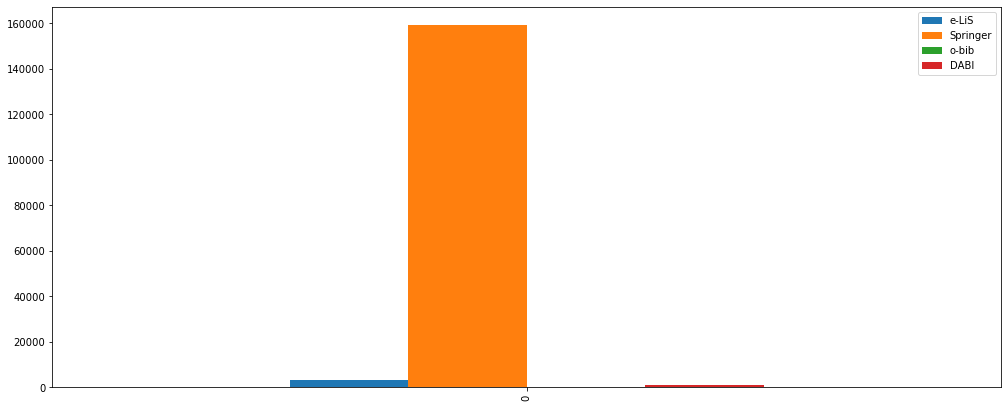

In [22]:
total = df_db["Springer"].iloc[0] + df_db["e-LiS"].iloc[0] + df_db["o-bib"].iloc[0] + df_db["DABI"].iloc[0]
print("1. Springer: ", round(100/total*df_db["Springer"].iloc[0],2), "%")
print("2. e-LiS: ", round(100/total*df_db["e-LiS"].iloc[0],2), "%")
print("3. DABI: ", round(100/total*df_db["DABI"].iloc[0],2), "%")
print("4. o-bib: ", round(100/total*df_db["o-bib"].iloc[0],2), "%")

plt.rcParams['figure.figsize']=(17,7)
df_db.plot(kind='bar')

Language:

int Eng:  138901
int Ger:  24620
% Eng:  84.94
% Ger:  15.06


<AxesSubplot:>

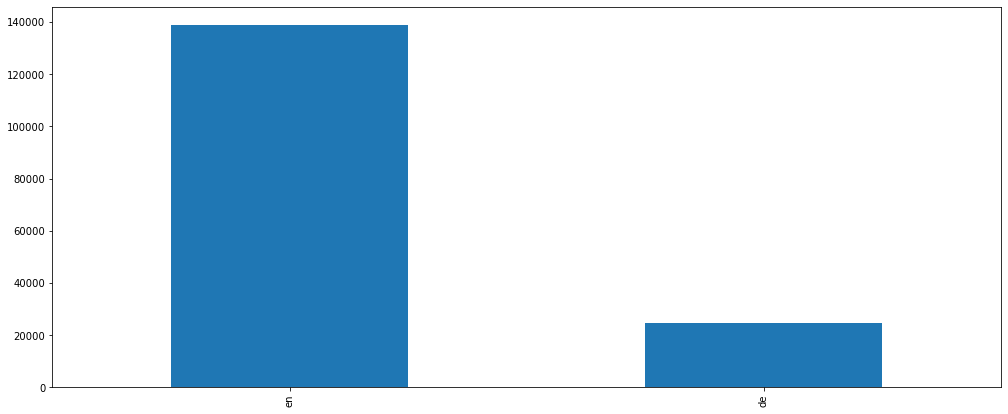

In [23]:
numbers_en = df['language'].value_counts()['en']
numbers_de = df['language'].value_counts()['de']
total = numbers_de + numbers_en
perc_eng = 100/total*numbers_en
perc_deu = 100/total*numbers_de

print("int Eng: ", numbers_en)
print("int Ger: ", numbers_de)
print("% Eng: ", round(perc_eng,2))
print("% Ger: ", round(perc_deu,2))

plt.rcParams['figure.figsize']=(17,7)
df['language'].value_counts().plot(kind='bar')

Class distribution:

In [24]:
list_ordering = ["1.","1.1.","1.2.","1.3.", "1.4.", "2.", "2.1.", "2.2.", "2.3.", "2.4.", 
                 "3.", "3.1.", "3.2.", "3.3.", "3.4.", "3.5.", "4.", "4.1.", "4.2.", 
                 "5.", "5.1.", "5.2.", "5.3.", "6.", "6.1.", "6.2.", "6.3.", "6.4.", 
                 "7.", "7.1.", "7.2.", "7.3.", "7.4."]

df_class = pd.DataFrame(columns=['label', 'class_1', 'class_2', 'class_3', 'total'])
df_class['label'] = list_ordering
df_class["total"] = 0

for index, row in df_class.iterrows():
    try:
        df_class.at[index, 'class_1'] = df.class_1.value_counts()[row['label']]
        df_class.at[index, 'class_2'] = df.class_2.value_counts()[row['label']]
        df_class.at[index, 'class_3'] = df.class_3.value_counts()[row['label']]
        df_class.at[index, 'total'] = df.class_1.value_counts()[row['label']] + df.class_2.value_counts()[row['label']] + df.class_3.value_counts()[row['label']]
    except:
        continue

df_class = df_class.fillna(0)

df_class

label  class_1  class_2  class_3  total
0     1.        0        0        0      0
1   1.1.    13897     2013     1380  17290
2   1.2.     3077     2651     1849   7577
3   1.3.     3367     2802     2077   8246
4   1.4.      183       27        3    213
5     2.        0        0        0      0
6   2.1.     5242     3491     1939  10672
7   2.2.     4380     3017     1606   9003
8   2.3.      103       99       62    264
9   2.4.    10098     2003      499  12600
10    3.        0        0        0      0
11  3.1.     2637     1925     1732   6294
12  3.2.     1995     2356     2123   6474
13  3.3.     8992     1782      331  11105
14  3.4.     6820     1077      171   8068
15  3.5.     1551       81       13   1645
16    4.        0        0        0      0
17  4.1.      250      205      104    559
18  4.2.     5443     3092     1111   9646
19    5.        0        0        0      0
20  5.1.     3141     1110      309   4560
21  5.2.     5303     3193     1132   9628
22  5.3.    10889     2502      665  14056
23    6.        0        0        0      0
24  6.1.    13491     3849      768  18108
25  6.2.    10155     3739     1139  15033
26  6.3.      622      667      223   1512
27  6.4.     4566     1775      572   6913
28    7.        0        0        0      0
29  7.1.    11058     3974     1030  16062
30  7.2.    11786     3067      642  15495
31  7.3.    12341     5009     2536  19886
32  7.4.    12134     5695     2631  20460

The most common classes:

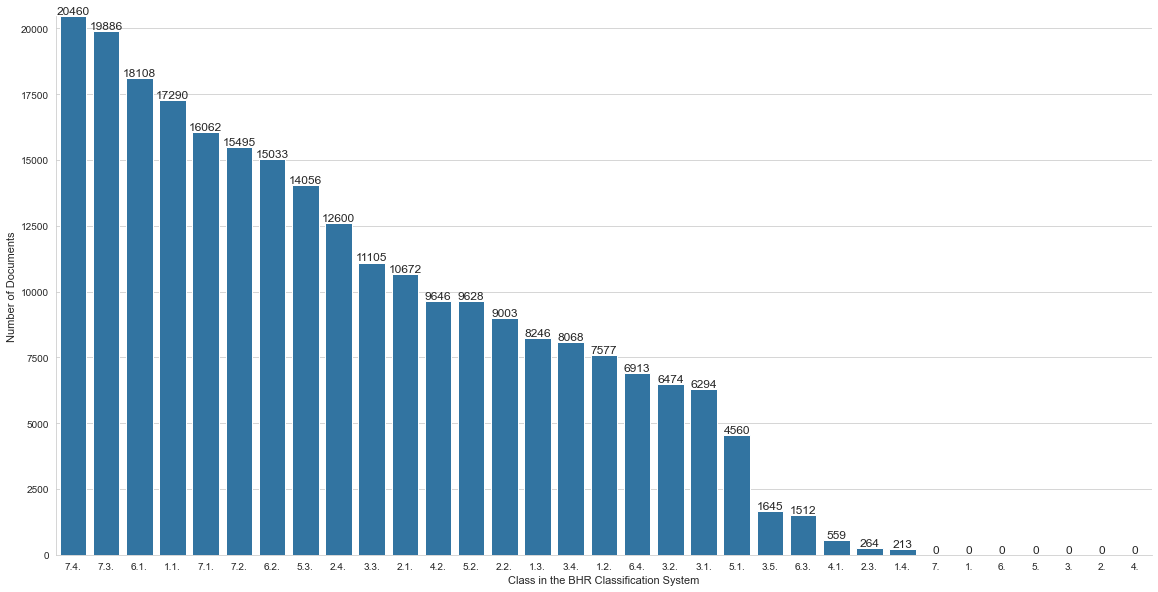

In [25]:
"""df_class_max = df_class.sort_values('total', ascending=False)
value_labels = df_class_max['total'].to_list()
fig = df_class_max.plot(x='label', y='total', grid=False, kind='bar', legend=False, color="#1f77b4")
fig.set_ylabel("Number of Documents")
fig.set_xlabel("Class in the BHR Classification System")

rects = fig.patches

for rect, value_labels in zip(rects, value_labels):
    height = rect.get_height()
    fig.text(
        rect.get_x() + rect.get_width() / 2, height + 5, value_labels, ha="center", va="bottom"
    )

plt.show()"""

df_class_max = df_class.sort_values('total', ascending=False)
sns.set_style("whitegrid")
gr = sns.catplot(x="label", y="total", kind="bar", data=df_class_max, height=8, aspect=2, legend_out=True, color='#1f77b4')

gr.set_ylabels("Number of Documents", fontsize=11)
gr.set_xlabels("Class in the BHR Classification System", fontsize=11)

ax = plt.gca()
y_max = df_class_max['total'].max() 
ax.set_ylim([0, y_max])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.show()

In [26]:
del df_class_max

Classes ordered:

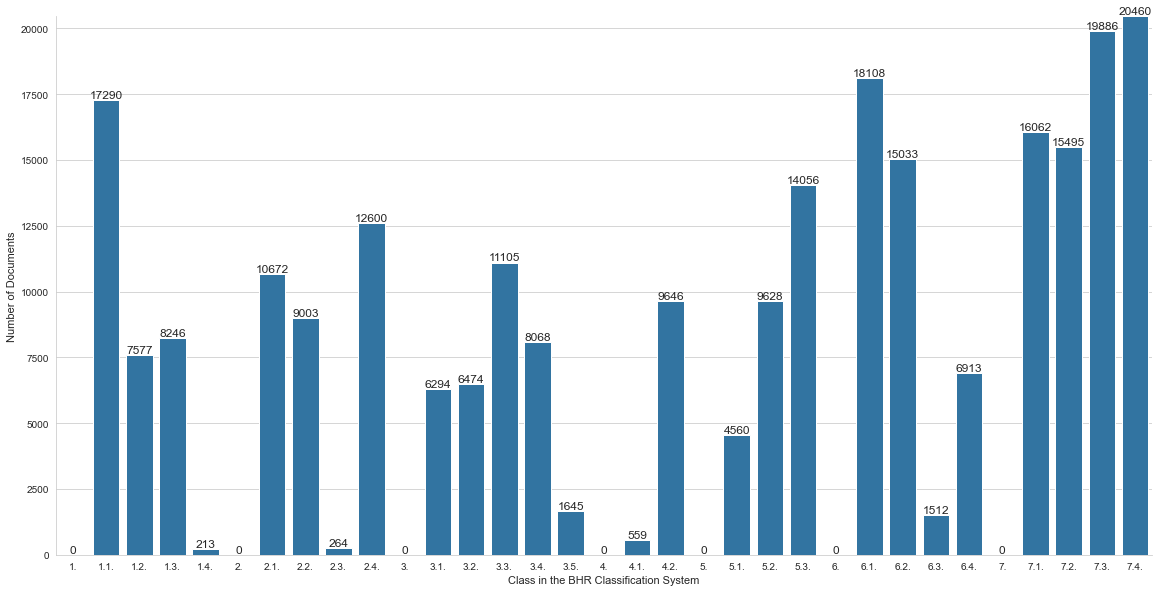

In [27]:
"""value_labels = df_class['total'].to_list()
df_class_max = df_class.sort_values('total', ascending=False)
fig = df_class.plot(x='label', y='total', grid=False, kind='bar', legend=False)
fig.set_ylabel("Number of Documents")
fig.set_xlabel("Class in the BHR Classification System")

rects = fig.patches

for rect, value_labels in zip(rects, value_labels):
    height = rect.get_height()
    fig.text(
        rect.get_x() + rect.get_width() / 2, height + 5, value_labels, ha="center", va="bottom"
    )

plt.show()"""

sns.set_style("whitegrid")
gr = sns.catplot(x="label", y="total", kind="bar", data=df_class, height=8, aspect=2, order=list_ordering, legend_out=True, color='#1f77b4')

gr.set_ylabels("Number of Documents", fontsize=11)
gr.set_xlabels("Class in the BHR Classification System", fontsize=11)

ax = plt.gca()
y_max = df_class['total'].max() 
ax.set_ylim([0, y_max])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

plt.show()

In [28]:
print("The final dataset has", len(df), "entries.")

The final dataset has 163521 entries.


In [29]:
df = df.rename(columns={'e-LiS': 'JITA', 'Springer': 'springer'})
df.to_csv('F:/Masterarbeit/Scraping/Modified_DataSet_7.csv',index=False, sep=';')